<h2> Deep Q-Network (DQN) </h2>
<h4>Deep Q-Network (DQN) is a reinforcement learning algorithm that combines Q-learning with deep neural networks. 
    
DQN replaces the Q-table with a neural network (the Q-network) that approximates the Q-function:
Q(state, action) ≈ predicted reward</h4>

<h4>Setting up the environment and training for DQN</h4>

In [2]:
pip install -e src/gym-idsgame

Obtaining file:///Users/krishnaasrinivas/Desktop/AI-Agent-for-Cyber-Security/src/gym-idsgame
  Preparing metadata (setup.py) ... done
  Attempting uninstall: gym_idsgame
    Found existing installation: gym_idsgame 1.0.12
    Uninstalling gym_idsgame-1.0.12:
      Successfully uninstalled gym_idsgame-1.0.12
  DEPRECATION: Legacy editable install of gym_idsgame==1.0.12 from file:///Users/krishnaasrinivas/Desktop/AI-Agent-for-Cyber-Security/src/gym-idsgame (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for gym_idsgame
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip uninstall gymnasium
!pip install gym==0.21.0
!pip install scikit-learn

!pip install gym-idsgame==1.0.12

  Using cached gym-0.21.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      /opt/homebrew/anaconda3/envs/gym-idsgame/lib/python3.13/site-packages/setuptools/_distutils/dist.py:270: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      error in gym setup command: 'extras_require' must be a dictionary whose values are strings or lists of strings containing valid project/version requirement specifiers.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached gym_idsgame-1.0.12-py3-none-any.whl.metadata (1.1 kB)
  Using cached

In [1]:
import gymnasium
from gymnasium.core import Env

def patched_reset(self):
    return self.reset()

Env.reset = patched_reset


In [24]:
import os
import gym
import gym_idsgame
import numpy as np
import torch
# src/environment/idsgame_wrapper.py
# from src.agents.dqn_agent import DQNAgent
from src.environment.compatibility_wrapper import GymCompatibilityWrapper
from src.utils.utils import print_summary
from src.utils.plotting import plot_results
# from src.utils import create_artefact_dirs

print('DONE IMPORTING')


DONE IMPORTING


In [ ]:
!cp ~/Desktop/AI-Agent-for-Cyber-Security/missing_files_for_gym/*.py \
/usr/local/lib/python3.10/dist-packages/gym/utils/

=== Starting Comprehensive Environment Exploration ===


=== Environment Configuration ===

Network Configuration:
- num_layers: 1
- num_servers_per_layer: 2
- num_attack_types: 4
- max_value: 9

Observation Spaces:

Attacker Observation:
- shape: (4, 10)
- range: (0.0, 10.0)
- reconnaissance_enabled: True
- local_view: False

Defender Observation:
- shape: (4, 5)
- range: (0.0, 1.0)
- fully_observed: False

=== Test Episode Analysis ===

Episode Statistics:
- Total Steps: 102
- Average Reward: -1.97
- Attack Success Rate: 0.00%
- Detection Rate: 0.00%
- Defense Effectiveness: 0.00%
- Reconnaissance Rate: 0.00%

Current State Information:
- Attacker Position: (1, 0)
- Game Step: 101
- Episode Done: False
- Attacker Detected: False
- Target Hacked: False
- Reconnaissance Actions: 0

Attack-Defense Statistics:
- Total Attacks: 0
- Failed Attacks: 0
- Total Defenses: 96
- Attack Detections: 0
- Hack Probability: 0.00%

Action Spaces:
- Defender Actions: 20
- Attack Actions: 20

Environmen

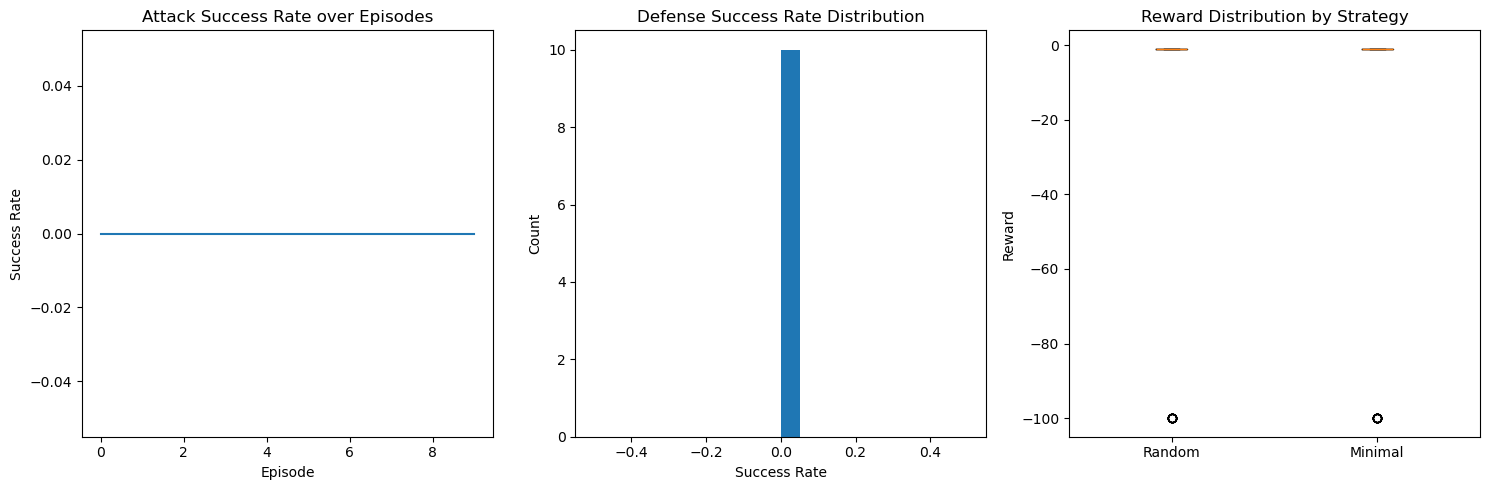

{'transitions': [{'defense_action': 0,
   'reward': (-1, 0),
   'state_change': 0.0,
   'detection': False,
   'attack_success': False},
  {'defense_action': 1,
   'reward': (-1, 0),
   'state_change': 0.0,
   'detection': False,
   'attack_success': False},
  {'defense_action': 2,
   'reward': (-1, 0),
   'state_change': 0.0,
   'detection': False,
   'attack_success': False},
  {'defense_action': 3,
   'reward': (-1, 0),
   'state_change': 0.0,
   'detection': False,
   'attack_success': False},
  {'defense_action': 4,
   'reward': (-1, 0),
   'state_change': 0.0,
   'detection': False,
   'attack_success': False},
  {'defense_action': 5,
   'reward': (-1, 0),
   'state_change': 0.0,
   'detection': False,
   'attack_success': False},
  {'defense_action': 6,
   'reward': (-1, 0),
   'state_change': 0.0,
   'detection': False,
   'attack_success': False},
  {'defense_action': 7,
   'reward': (-1, 0),
   'state_change': 0.0,
   'detection': False,
   'attack_success': False},
  {'defen

In [25]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from src.environment.explorer import IDSGameExplorer
explorer = IDSGameExplorer()
explorer.run_comprehensive_exploration()


<h4>Trainging and running the algorithm for "idsgame-random_attack-v8" environment</h4>

In [35]:
import src.agents.dqn_agent
print(src.agents.dqn_agent.__file__)


/Users/krishnaasrinivas/Desktop/AI-Agent-for-Cyber-Security/src/agents/dqn_agent.py


In [27]:
import os
import gymnasium as gym
import warnings
from datetime import datetime

# from gym_idsgame.agents.training_agents.q_learning.q_agent_config import QAgentConfig
# from gym_idsgame.agents.training_agents.q_learning.dqn.dqn_config import DQNConfig
from experiments.util import util
from experiments.util.plotting_util import read_and_plot_results
# from src.agents.ddqn_agent import DDQNAgent
from src.utils.utils import get_output_dir, print_summary
from src.environment.compatibility_wrapper import GymCompatibilityWrapper
from src.utils.plotting import plot_results

warnings.filterwarnings('ignore')
print('done')

done


In [30]:
env_name = "idsgame-random_attack-v8"
output_dir = os.getcwd()
random_seed = 33
env = gym.make(env_name, save_dir=output_dir + "results/data/" + str(random_seed))
# env = GymCompatibilityWrapper(env)

env = GymCompatibilityWrapper(env)
env = env.unwrapped

print("\nEnvironment Information:")
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")



Environment Information:
Observation Space: Box(0, 9, (1, 11), int32)
Action Space: Discrete(30)


In [31]:
import os
import csv
import matplotlib.pyplot as plt

def save_rewards_to_csv(reward_history, filename="rewards.csv"):
    with open(filename, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Episode", "Reward"])
        for i, reward in enumerate(reward_history):
            writer.writerow([i, reward])

def plot_rewards(reward_history, title="Reward Over Episodes", save_path="reward_plot.png"):
    plt.figure(figsize=(10, 5))
    plt.plot(reward_history, label="Reward")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(save_path)
    plt.close()


In [32]:
from src.agents.dqn_agent import DQNAgent
import numpy as np
import gym
import gym_idsgame


# === Get dimensions ===
sample_obs = env.reset()[0]
state_dim = np.array(sample_obs).flatten().shape[0]
action_dim = env.attacker_action_space.n

# === Agent ===
agent = DQNAgent(state_dim=state_dim, action_dim=action_dim)

# === Training ===
reward_history = []
num_episodes = 10000
max_steps = 100

def extract_attacker_obs(obs):
    obs = obs[0] if isinstance(obs, tuple) else obs
    return np.array(obs).flatten()

for ep in range(num_episodes):
    state = extract_attacker_obs(env.reset())
    total_reward = 0

    for t in range(max_steps):
        action = agent.select_action(state)
        def_action = env.defender_action_space.sample()
        full_action = (action, def_action)

        next_obs, reward, terminated, truncated, _ = env.step(full_action)
        done = terminated or truncated
        next_state = extract_attacker_obs(next_obs)

        agent.store(state, action, reward[0], next_state, done)
        agent.update()

        state = next_state
        total_reward += reward[0]

        if done:
            break

    reward_history.append(total_reward)
    print(f'$$$$$$$$$$$$ ep: {ep}, reward : {total_reward}')

    # Logging
    if ep % 10 == 0:
        avg_last_10 = np.mean(reward_history[-10:])
        print(f"[Ep {ep}] AvgReward (last 10): {avg_last_10:.2f} | Total: {total_reward:.2f} | Epsilon: {agent.epsilon:.3f}")


$$$$$$$$$$$$ ep: 0, reward : -1
[Ep 0] AvgReward (last 10): -1.00 | Total: -1.00 | Epsilon: 1.000
$$$$$$$$$$$$ ep: 1, reward : -1
$$$$$$$$$$$$ ep: 2, reward : -1
$$$$$$$$$$$$ ep: 3, reward : -1
$$$$$$$$$$$$ ep: 4, reward : -1
$$$$$$$$$$$$ ep: 5, reward : -1
$$$$$$$$$$$$ ep: 6, reward : -1
$$$$$$$$$$$$ ep: 7, reward : 0.5
$$$$$$$$$$$$ ep: 8, reward : -1
$$$$$$$$$$$$ ep: 9, reward : -1
$$$$$$$$$$$$ ep: 10, reward : -1
[Ep 10] AvgReward (last 10): -0.85 | Total: -1.00 | Epsilon: 1.000
$$$$$$$$$$$$ ep: 11, reward : 2.75
$$$$$$$$$$$$ ep: 12, reward : 0.33333333333333326
$$$$$$$$$$$$ ep: 13, reward : -1
$$$$$$$$$$$$ ep: 14, reward : -1
$$$$$$$$$$$$ ep: 15, reward : -1
$$$$$$$$$$$$ ep: 16, reward : -1
$$$$$$$$$$$$ ep: 17, reward : -1
$$$$$$$$$$$$ ep: 18, reward : 0.19999999999999996
$$$$$$$$$$$$ ep: 19, reward : -1
$$$$$$$$$$$$ ep: 20, reward : 0.19999999999999996
[Ep 20] AvgReward (last 10): -0.25 | Total: 0.20 | Epsilon: 0.914
$$$$$$$$$$$$ ep: 21, reward : 0.10000000000000009
$$$$$$$$$$$$ e

In [33]:
save_rewards_to_csv(reward_history, filename="rewards.csv")
plot_rewards(reward_history, title="DQN Training Rewards")
